In [288]:
## Machine Learning Online Class - Exercise 4 Neural Network Learning

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoidGradient.m
#     randInitializeWeights.m
#     nnCostFunction.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import numpy as np
import scipy.io as scio
from scipy import optimize
import sys
sys.path.append(r"..")
import lib.plotting as libplt
import importlib
importlib.reload(libplt)


## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

# 1. 加载和可视化数据

Loading and Visualizing Data ...

m, n: 100, 400
display_rows:10
display_cols:10


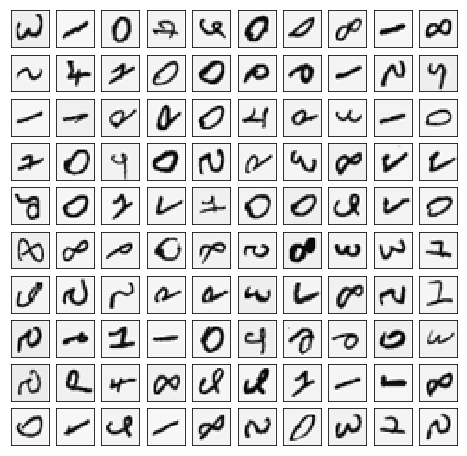

In [289]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

data = scio.loadmat('ex4data1.mat')
X = data['X']
y = data['y']
m = len(X);

# Randomly select 100 data points to display
sel = np.random.permutation(range(m))
sel = sel[:100]

libplt.displayData(X[sel, :])

# 2. 加载参数

In [286]:
## ================ Part 2: Loading Parameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
param = scio.loadmat('ex4weights.mat');
Theta1 = param['Theta1']
Theta2 = param['Theta2']

# Unroll parameters 
#nn_params = [Theta1(:) ; Theta2(:)];
nn_params = np.append(Theta1.ravel(),Theta2.ravel(),axis=None)


Loading Saved Neural Network Parameters ...



In [237]:
Theta1.shape

(25, 401)

# 3.计算Cost(前向传播)

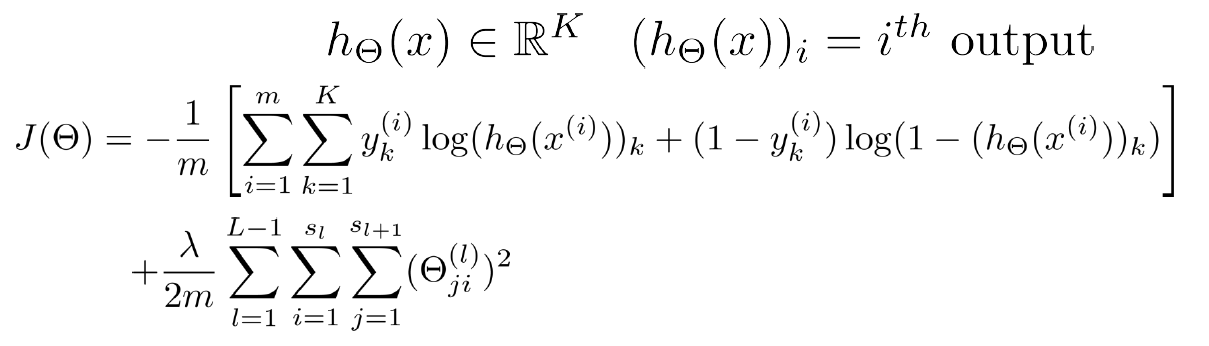

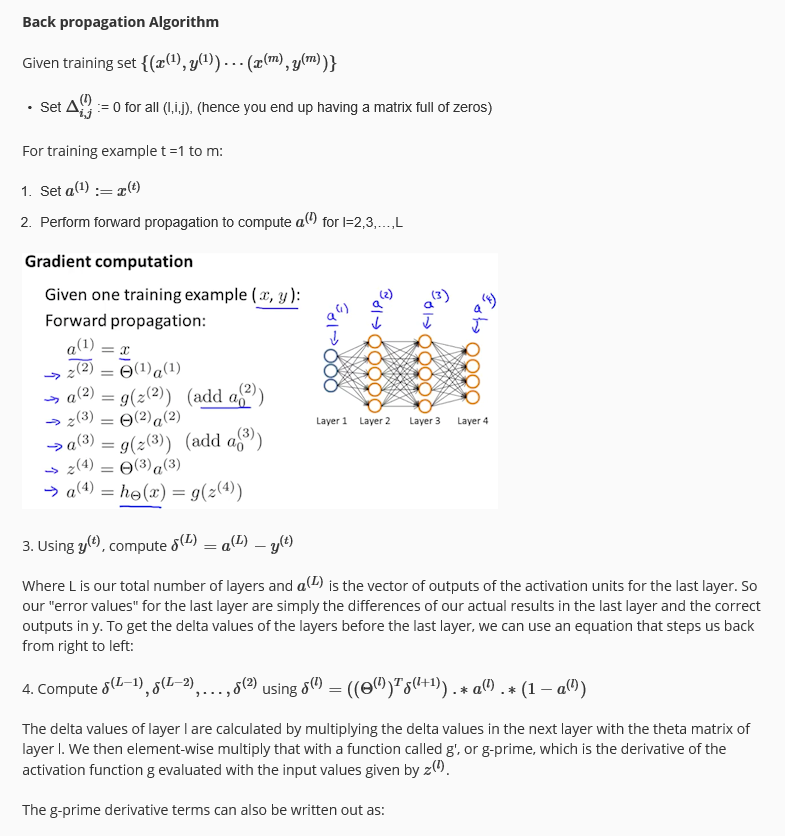
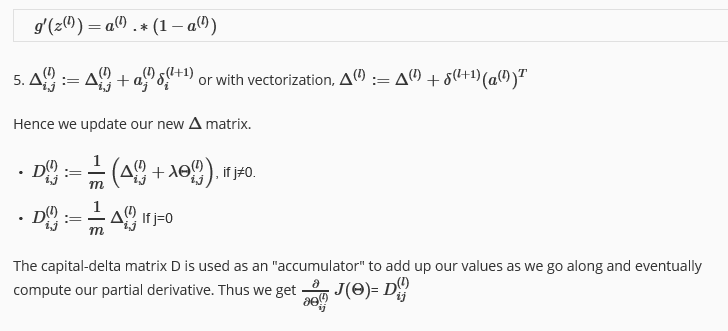

In [162]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [163]:
z2 = np.array([0.054017,   0.166433,  -0.523820,  -0.588183,   0.665184,   0.889567]).reshape(-1,2)

In [164]:
sigmoid(z2)

array([[ 0.51350097,  0.54151247],
       [ 0.37195942,  0.35705187],
       [ 0.66042394,  0.70880081]])

In [134]:
def sigmoidGradient(z):
    #SIGMOIDGRADIENT returns the gradient of the sigmoid function
    #evaluated at z
    #   g = SIGMOIDGRADIENT(z) computes the gradient of the sigmoid function
    #   evaluated at z. This should work regardless if z is a matrix or a
    #   vector. In particular, if z is a vector or matrix, you should return
    #   the gradient for each element.

    grad = np.zeros(z.shape);

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the gradient of the sigmoid function evaluated at
    #               each value of z (z can be a matrix, vector or scalar).
    

    g_z = 1/(1+np.exp(-z))
    
    grad = g_z*(1-g_z) # element-wise multiply

    return grad

In [188]:
def nnCostFunction(nn_params, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    #NNCOSTFUNCTION Implements the neural network cost function for a two layer
    #neural network which performs classification
    #   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
    #   X, y, lambda) computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices. 
    # 
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.
    #

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = len(X)

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the code by working through the
    #               following parts.
    #
    # Part 1: Feedforward the neural network and return the cost in the
    #         variable J. After implementing Part 1, you can verify that your
    #         cost function computation is correct by verifying the cost
    #         computed in ex4.m
    #
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #         Theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    #
    #need to add the column of 1's to the X matrix.
    y = y.reshape(-1,1)
    A_1 = np.column_stack((np.ones((m,1)),X))
    
    A_2 = sigmoid(A_1.dot(Theta1.T)) #5000*401,401*25->5000*25
    A_2 = np.column_stack((np.ones((len(A_2),1)), A_2))
    h = sigmoid(A_2.dot(Theta2.T)) #5000*26,26*10->5000*10
    
    #convert y(i) into 10 element vector

    y_matrix = np.eye(num_labels)[(y-1)[:,0],:] # 5000*10
    
    J_vec = np.zeros((m,1))
    for i in range(m):
        J_vec[i] = -(y_matrix[i].T.dot(np.log(h[i])+(1-y_matrix[i]).T.dot(np.log(1-h[i]))))
    J = np.average(J_vec)
    
    '''#J = -(np.sum(y_matrix.dot(np.log(h).T)) + np.sum((1-y_matrix).dot((1-np.log(h)).T)))/m #without regularization
    # Since y_matrix and a3 are both matrices, you need to compute the double-sum
    # Remember to use element-wise multiplication with the log() function
    sum_1 = -np.sum((y_matrix*np.log(h) + (1-y_matrix)*(1-np.log(h))),axis = 0)/m
    sum_2 = np.sum(sum_1)
    # why cannot use matrix multiple here?
    # https://www.coursera.org/learn/machine-learning/discussions/all/threads/AzIrrO7wEeaV3gonaJwAFA
    #J = -(np.sum(y_matrix*np.log(h)) + np.sum((1-y_matrix)*(1-np.log(h))))/m #without regularization
    J = -np.sum(y_matrix*np.log(h) + (1-y_matrix)*(1-np.log(h)))/m
    print(sum_1)
    print(sum_2)'''
    
    #the assumption here is there're 3 layers
    L = 3
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    
    regular_vec = np.zeros((L-1,1))
    #regular_item = 0
    
    for l in range(L-1):
        regular_vec[l] = np.sum(Thetas_reg[l]*Thetas_reg[l]) #element wise multiply
        #regular_item += np.sum(Thetas[l]*Thetas[l]) #element wise multiply
        
        
    J = J+0.5*plambda*np.sum(regular_vec)/m
    
    print(J)
    return J


In [299]:
def nnCostFunction_Gradient(nn_params, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    #NNCOSTFUNCTION Implements the neural network cost function for a two layer
    #neural network which performs classification
    #   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
    #   X, y, lambda) computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices. 
    # 
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.
    #

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = len(X)

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the code by working through the
    #               following parts.
    #
    # Part 1: Feedforward the neural network and return the cost in the
    #         variable J. After implementing Part 1, you can verify that your
    #         cost function computation is correct by verifying the cost
    #         computed in ex4.m
    #
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #         Theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    #
    #need to add the column of 1's to the X matrix.
    y = y.reshape(-1,1)
    A_1 = np.column_stack((np.ones((m,1)),X))
    
    A_2 = sigmoid(A_1.dot(Theta1.T)) #5000*401,401*25->5000*25
    A_2 = np.column_stack((np.ones((len(A_2),1)), A_2))
    h = sigmoid(A_2.dot(Theta2.T)) #5000*26,26*10->5000*10
    
    #convert y(i) into 10 element vector

    y_matrix = np.eye(num_labels)[(y-1)[:,0],:] # 5000*10
    
    J_vec = np.zeros((m,1))
    for i in range(m):
        J_vec[i] = -(y_matrix[i].T.dot(np.log(h[i])+(1-y_matrix[i]).T.dot(np.log(1-h[i]))))
    J = np.average(J_vec)
    
    '''#J = -(np.sum(y_matrix.dot(np.log(h).T)) + np.sum((1-y_matrix).dot((1-np.log(h)).T)))/m #without regularization
    # Since y_matrix and a3 are both matrices, you need to compute the double-sum
    # Remember to use element-wise multiplication with the log() function
    sum_1 = -np.sum((y_matrix*np.log(h) + (1-y_matrix)*(1-np.log(h))),axis = 0)/m
    sum_2 = np.sum(sum_1)
    # why cannot use matrix multiple here?
    # https://www.coursera.org/learn/machine-learning/discussions/all/threads/AzIrrO7wEeaV3gonaJwAFA
    #J = -(np.sum(y_matrix*np.log(h)) + np.sum((1-y_matrix)*(1-np.log(h))))/m #without regularization
    J = -np.sum(y_matrix*np.log(h) + (1-y_matrix)*(1-np.log(h)))/m
    print(sum_1)
    print(sum_2)'''
    
    #the assumption here is there're 3 layers
    L = 3
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    
    regular_vec = np.zeros((L-1,1))
    #regular_item = 0
    
    for l in range(L-1):
        regular_vec[l] = np.sum(Thetas_reg[l]*Thetas_reg[l]) #element wise multiply
        #regular_item += np.sum(Thetas[l]*Thetas[l]) #element wise multiply
        
        
    J = J+0.5*plambda*np.sum(regular_vec)/m
    
        #grad = [Theta1_grad[:],Theta2_grad[:]]
    grad = [None] * 2
    
    #a_list = [None]*L # a1,a2,a3
    Thetas = [Theta1,Theta2]
    
    #DELTA = [None]*(L-1) #DELTA_1, DELTA_2, DELTA_3  len(a[l+1])*len(a[l])
    Delta1 = np.zeros((hidden_layer_size, input_layer_size + 1)) # DELTA1
    Delta2 = np.zeros((num_labels, hidden_layer_size + 1)) # DELTA2
 
    A1 = np.column_stack((np.ones((m,1)),X)) #5000*401
    Z2 = A1 @ (Theta1.T) #(m,n)*(n,h)->m,h
    '''print("Z2:")
    print(Z2)
    print("sigmoid gradient of Z2:")
    print(sigmoidGradient(Z2))'''
    g_Z2 = sigmoid(A1.dot(Theta1.T)) # 5000*25
    A2 = np.column_stack((np.ones((g_Z2.shape[0],1)),g_Z2)) #5000*26
    A3 = sigmoid(A2.dot(Theta2.T)) #5000*10
    '''print("A1:")
    print(A1)
    print("A2:")
    print(A2)
    print("A3:")
    print(A3)'''
    
    D3 = A3 - y_matrix # 5000*10
    D2 = D3.dot(Theta2[:,1:])*g_Z2*(1-g_Z2) #(5000,10)*(10,25)->5000*25
    '''print("D2")
    print(D2)
    print("D3")
    print(D3)'''
    
    #Let:
    #m = the number of training examples
    #n = the number of training features, including the initial bias unit. 
    #h = the number of units in the hidden layer - NOT including the bias unit 
    #r = the number of output classifications 

    #Δ1 or Delta1 is the product of d2 and a1. The size is (h x m) ⋅ (m x n) --> (h x n)
    Delta1 = D2.T @ A1 #25*401
    #Δ2 or Delta2 is the product of d3 and a2. The size is (r x m) ⋅ (m x [h+1]) --> (r x [h+1])
    Delta2 = D3.T @ A2 #10*26
            
    Delta = [Delta1, Delta2]
    '''print("Delta:")
    print(Delta)'''
   
    
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    for l in range(L-1):
        grad[l] = Delta[l]/m 
        grad[l][:,1:] += plambda * Thetas_reg[l]/m
    #print(grad)
    grad = np.append(grad[0].ravel(),grad[1].ravel(),axis=None)

    return J,grad


In [222]:
def nnGradient(nn_params, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    # use for fmin_cg function as fprime
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))

    '''print(Theta1)
    print(Theta2)'''
    # Setup some useful variables
    m = len(X)
    
    #the assumption here is there're 3 layers
    L = 3

    # You need to return the following variables correctly 
    
    #convert y(i) into 10 element vector
    y = y.reshape(-1,1)
    y_matrix = np.eye(num_labels)[(y-1)[:,0],:]
    
    #grad = [Theta1_grad[:],Theta2_grad[:]]
    grad = [None] * 2
    
    #a_list = [None]*L # a1,a2,a3
    Thetas = [Theta1,Theta2]
    
    #DELTA = [None]*(L-1) #DELTA_1, DELTA_2, DELTA_3  len(a[l+1])*len(a[l])
    Delta1 = np.zeros((hidden_layer_size, input_layer_size + 1)) # DELTA1
    Delta2 = np.zeros((num_labels, hidden_layer_size + 1)) # DELTA2
 
    A1 = np.column_stack((np.ones((m,1)),X)) #5000*401
    Z2 = A1 @ (Theta1.T) #(m,n)*(n,h)->m,h
    '''print("Z2:")
    print(Z2)
    print("sigmoid gradient of Z2:")
    print(sigmoidGradient(Z2))'''
    g_Z2 = sigmoid(A1.dot(Theta1.T)) # 5000*25
    A2 = np.column_stack((np.ones((g_Z2.shape[0],1)),g_Z2)) #5000*26
    A3 = sigmoid(A2.dot(Theta2.T)) #5000*10
    '''print("A1:")
    print(A1)
    print("A2:")
    print(A2)
    print("A3:")
    print(A3)'''
    
    D3 = A3 - y_matrix # 5000*10
    D2 = D3.dot(Theta2[:,1:])*g_Z2*(1-g_Z2) #(5000,10)*(10,25)->5000*25
    '''print("D2")
    print(D2)
    print("D3")
    print(D3)'''
    
    #Let:
    #m = the number of training examples
    #n = the number of training features, including the initial bias unit. 
    #h = the number of units in the hidden layer - NOT including the bias unit 
    #r = the number of output classifications 

    #Δ1 or Delta1 is the product of d2 and a1. The size is (h x m) ⋅ (m x n) --> (h x n)
    Delta1 = D2.T @ A1 #25*401
    #Δ2 or Delta2 is the product of d3 and a2. The size is (r x m) ⋅ (m x [h+1]) --> (r x [h+1])
    Delta2 = D3.T @ A2 #10*26
            
    Delta = [Delta1, Delta2]
    '''print("Delta:")
    print(Delta)'''
   
    
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    for l in range(L-1):
        grad[l] = Delta[l]/m 
        grad[l][:,1:] += plambda * Thetas_reg[l]/m
    #print(grad)
    grad = np.append(grad[0].ravel(),grad[1].ravel(),axis=None)
    
    return grad

In [167]:
Theta1 = np.reshape(nn[:hl * (il + 1)], 
                     (hl, (il + 1)))
Theta1

array([[ 0.1,  0.2,  0.3],
       [ 0.4,  0.5,  0.6]])

In [169]:
X

array([[ 0.54030231, -0.41614684],
       [-0.9899925 , -0.65364362],
       [ 0.28366219,  0.96017029]])

In [170]:
A1 = np.column_stack((np.ones((3,1)),X)) #5000*401
A1

array([[ 1.        ,  0.54030231, -0.41614684],
       [ 1.        , -0.9899925 , -0.65364362],
       [ 1.        ,  0.28366219,  0.96017029]])

In [172]:
Z2 = A1.dot (Theta1.T) #(m,n)*(n,h)->m,h
Z2

array([[ 0.08321641,  0.42046305],
       [-0.29409159, -0.48718242],
       [ 0.44478352,  1.11793326]])

In [173]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [174]:
a.reshape(2,3,order='F')

array([[0, 2, 4],
       [1, 3, 5]])

In [190]:
nn = np.array(range(1,19,1)) / 10;
nn

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8])

In [193]:
np.append(np.reshape(nn[:hl * (il + 1)], 
                     (hl, (il + 1)),order='F').ravel(),np.reshape(nn[(hl * (il + 1)):], 
                     (nl, (hl + 1)),order='F').ravel(),axis=None)

array([ 0.1,  0.5,  0.4,  0.3,  0.2,  0.6,  0.7,  1.1,  1.5,  0.8,  1.2,
        1.6,  0.9,  1.3,  1.7,  1. ,  1.4,  1.8])

Test Case for gradient

In [210]:
il = 2;              # input layer
hl = 2;              # hidden layer
nl = 4;              # number of labels
nn = np.array(range(1,19,1)) / 10;  # nn_params
nn = np.append(np.reshape(nn[:hl * (il + 1)], 
                     (hl, (il + 1)),order='F').ravel(),np.reshape(nn[(hl * (il + 1)):], 
                     (nl, (hl + 1)),order='F').ravel(),axis=None) # MATLAB里reshape是先列后行填充的，为了与Test Case期望结果相一致
#需要做一下变换
X = np.cos([[1, 2] , [3, 4] , [5, 6]]);
y = np.array([4, 2, 3]).reshape(-1,1)
plambda = 4;
J = nnCostFunction(nn, il, hl, nl, X, y, plambda)
grad = nnGradient(nn, il, hl, nl, X, y, plambda)

19.4736365227
[[ 0.1  0.3  0.5]
 [ 0.2  0.4  0.6]]
[[ 0.7  1.1  1.5]
 [ 0.8  1.2  1.6]
 [ 0.9  1.3  1.7]
 [ 1.   1.4  1.8]]
Z2:
[[ 0.05401727  0.16643282]
 [-0.52381956 -0.58818317]
 [ 0.6651838   0.88956705]]
sigmoid gradient of Z2:
[[ 0.24981772  0.24827672]
 [ 0.23360564  0.22956582]
 [ 0.22426417  0.20640222]]
A1:
[[ 1.          0.54030231 -0.41614684]
 [ 1.         -0.9899925  -0.65364362]
 [ 1.          0.28366219  0.96017029]]
A2:
[[ 1.          0.51350104  0.54151243]
 [ 1.          0.37195953  0.35705183]
 [ 1.          0.66042389  0.70880082]]
A3:
[[ 0.88865937  0.90742746  0.92330495  0.93664935]
 [ 0.83817796  0.86028203  0.87979978  0.89691772]
 [ 0.92341429  0.93857754  0.95089825  0.96085064]]
D2
[[ 0.79393166  1.05280756]
 [ 0.73673581  0.95128166]
 [ 0.76774763  0.93560138]]
D3
[[ 0.88865937  0.90742746  0.92330495 -0.06335065]
 [ 0.83817796 -0.13971797  0.87979978  0.89691772]
 [ 0.92341429  0.93857754 -0.04910175  0.96085064]]
Delta:
[array([[ 2.29841511, -0.08261885

In [206]:
print(J)
print(grad)

19.4736365227
[ 0.76613837  1.17246038  1.97507122  0.97989687  1.56415579  2.34613831
  0.88341721  4.85931355  6.47833662  0.56876234  5.14461818  6.76892041
  0.58466766  5.45631333  7.05977062  0.59813924  5.91188506  7.52233089]


In [104]:
np.cos([1, 2 , 3, 4 , 5, 6]).reshape(3,2)

array([[ 0.54030231, -0.41614684],
       [-0.9899925 , -0.65364362],
       [ 0.28366219,  0.96017029]])

In [105]:
nn

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8])

In [207]:
J = nnCostFunction(nn, il, hl, nl, X, y, 0)
grad = nnGradient(nn, il, hl, nl, X, y, 0)

7.40696985607
[[ 0.1  0.3  0.5]
 [ 0.2  0.4  0.6]]
[[ 0.7  1.1  1.5]
 [ 0.8  1.2  1.6]
 [ 0.9  1.3  1.7]
 [ 1.   1.4  1.8]]
Z2:
[[ 0.05401727  0.16643282]
 [-0.52381956 -0.58818317]
 [ 0.6651838   0.88956705]]
sigmoid gradient of Z2:
[[ 0.24981772  0.24827672]
 [ 0.23360564  0.22956582]
 [ 0.22426417  0.20640222]]
A1:
[[ 1.          0.54030231 -0.41614684]
 [ 1.         -0.9899925  -0.65364362]
 [ 1.          0.28366219  0.96017029]]
A2:
[[ 1.          0.51350104  0.54151243]
 [ 1.          0.37195953  0.35705183]
 [ 1.          0.66042389  0.70880082]]
A3:
[[ 0.88865937  0.90742746  0.92330495  0.93664935]
 [ 0.83817796  0.86028203  0.87979978  0.89691772]
 [ 0.92341429  0.93857754  0.95089825  0.96085064]]
D2
[[ 0.79393166  1.05280756]
 [ 0.73673581  0.95128166]
 [ 0.76774763  0.93560138]]
D3
[[ 0.88865937  0.90742746  0.92330495 -0.06335065]
 [ 0.83817796 -0.13971797  0.87979978  0.89691772]
 [ 0.92341429  0.93857754 -0.04910175  0.96085064]]
Delta:
[array([[ 2.29841511, -0.08261885

In [208]:
print(J)
print(grad)

7.40696985607
[ 0.76613837 -0.02753962 -0.02492878  0.97989687 -0.03584421 -0.05386169
  0.88341721  0.45931355  0.47833662  0.56876234  0.34461818  0.36892041
  0.58466766  0.25631333  0.25977062  0.59813924  0.31188506  0.32233089]


In [337]:
test = np.array([1,2,3]).reshape(-1,1)
np.row_stack((np.ones(1),test))

array([[ 1.],
       [ 1.],
       [ 2.],
       [ 3.]])

In [5]:
import numpy as np
np.array(range(18))/10

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7])

In [339]:
Theta1.shape

(25, 401)

In [215]:
## ================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. You
#  should complete the code in nnCostFunction.m to return cost. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.
#
print('\nFeedforward Using Neural Network ...\n')

# Weight regularization parameter (we set this to 0 here).
plambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, plambda);

print('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.287629)\n'%J);


Feedforward Using Neural Network ...

0.287629165161
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)



# 4. 实现正则化

In [216]:
## =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
#

print('\nChecking Cost Function (w/ Regularization) ... \n')

# Weight regularization parameter (we set this to 1 here).
plambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, plambda);

print('Cost at parameters (loaded from ex4weights): %f '
         '\n(this value should be about 0.383770)\n'%J);


Checking Cost Function (w/ Regularization) ... 

0.383769859091
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



# 5. Sigmoid 梯度

In [11]:
## ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. You should complete the
#  code in the sigmoidGradient.m file.
#

print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]));
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print(g)


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]


In [87]:
test_array = np.array([-1,-2,-3,8,1,6,3,5,7,4,9,2]).reshape(4,3)
sigmoidGradient(test_array) # 测试通过

array([[  1.96611933e-01,   1.04993585e-01,   4.51766597e-02],
       [  3.35237671e-04,   1.96611933e-01,   2.46650929e-03],
       [  4.51766597e-02,   6.64805667e-03,   9.10221180e-04],
       [  1.76627062e-02,   1.23379350e-04,   1.04993585e-01]])

In [109]:
test_array = np.array([  0.054017,   0.166433,  -0.523820,0.588183,   0.665184,   0.889567]).reshape(3,2)
sigmoidGradient(test_array)

array([[ 0.24981772,  0.24827671],
       [ 0.23360561,  0.22956583],
       [ 0.22426416,  0.20640222]])

# 7. 实现反向传播

In [25]:
def debugInitializeWeights(fan_out, fan_in):
    #DEBUGINITIALIZEWEIGHTS Initialize the weights of a layer with fan_in
    #incoming connections and fan_out outgoing connections using a fixed
    #strategy, this will help you later in debugging
    #   W = DEBUGINITIALIZEWEIGHTS(fan_in, fan_out) initializes the weights 
    #   of a layer with fan_in incoming connections and fan_out outgoing 
    #   connections using a fix set of values
    #
    #   Note that W should be set to a matrix of size(1 + fan_in, fan_out) as
    #   the first row of W handles the "bias" terms
    #

    # Set W to zeros
    W = np.zeros((fan_out, 1 + fan_in))

    # Initialize W using "sin", this ensures that W is always of the same
    # values and will be useful for debugging
    W = np.sin(range(W.size)).reshape(W.shape)
    return W

In [26]:
#def computeNumericalGradient(J, theta): # 怎样实现原MATLAB代码中函数句柄？
def computeNumericalGradient(J, theta, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    #COMPUTENUMERICALGRADIENT Computes the gradient using "finite differences"
    #and gives us a numerical estimate of the gradient.
    #   numgrad = COMPUTENUMERICALGRADIENT(J, theta) computes the numerical
    #   gradient of the function J around theta. Calling y = J(theta) should
    #   return the function value at theta.

    # Notes: The following code implements numerical gradient checking, and 
    #        returns the numerical gradient.It sets numgrad(i) to (a numerical 
    #        approximation of) the partial derivative of J with respect to the 
    #        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
    #        be the (approximately) the partial derivative of J with respect 
    #        to theta(i).)
    #                

    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4;
    for p in range(theta.size):
    
        # Set perturbation vector
        perturb[p] = e;
        loss1 = J(theta - perturb,input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda)
        loss2 = J(theta + perturb,input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda)
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e);
        perturb[p] = 0
    

    return numgrad


In [275]:
def checkNNGradients(plambda=0):
    #CHECKNNGRADIENTS Creates a small neural network to check the
    #backpropagation gradients
    #   CHECKNNGRADIENTS(lambda) Creates a small neural network to check the
    #   backpropagation gradients, it will output the analytical gradients
    #   produced by your backprop code and the numerical gradients (computed
    #   using computeNumericalGradient). These two gradient computations should
    #   result in very similar values.
    #
    

    input_layer_size = 3;
    hidden_layer_size = 5;
    num_labels = 3;
    m = 5;

    # We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size);
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size);
    # Reusing debugInitializeWeights to generate X
    X  = debugInitializeWeights(m, input_layer_size - 1);
    #y  = 1 + np.mod(range(m), num_labels).T
    #y  = 1 + np.mod(range(1,m+1,1), num_labels).T
    y  = (1 + np.mod(range(1,m+1,1), num_labels)).reshape(-1,1)
    print(y)

    # Unroll parameters
    nn_params = np.append(Theta1.ravel(), Theta2.ravel(), axis = None)

    # Short hand for cost function
    #costFunc = @(p) nnCostFunction(p, input_layer_size, hidden_layer_size, \
     #                              num_labels, X, y, lambda);

    cost = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                                  num_labels, X, y, plambda)
    grad = nnGradient(nn_params, input_layer_size, hidden_layer_size, 
                                  num_labels, X, y, plambda)
    numgrad = computeNumericalGradient(nnCostFunction, nn_params, input_layer_size, hidden_layer_size, 
                                  num_labels, X, y, plambda)
    
    #unroll grad， work for 3-layer NN only
    #grad = np.append(grad[0].ravel(),grad[1].ravel(),axis=None)

    # Visually examine the two gradient computations.  The two columns
    # you get should be very similar. 
    #print([numgrad, grad]);
    print("numgrad:")
    print(numgrad)
    print("grad:")
    print(grad)
    
    print('The above two columns you get should be very similar.\n  \
             (Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n')

    # Evaluate the norm of the difference between two solutions.  
    # If you have a correct implementation, and assuming you used EPSILON = 0.0001 
    # in computeNumericalGradient.m, then diff below should be less than 1e-9
    
    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)

    print('If your backpropagation implementation is correct, then \n  \
             the relative difference will be small (less than 1e-9). \n  \
             \nRelative Difference: %g\n'%diff)


In [276]:
## =============== Part 7: Implement Backpropagation ===============
#  Once your cost matches up with ours, you should proceed to implement the
#  backpropagation algorithm for the neural network. You should add to the
#  code you've written in nnCostFunction.m to return the partial
#  derivatives of the parameters.
#
print('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()



Checking Backpropagation... 

[[2]
 [3]
 [1]
 [2]
 [3]]
2.09621276412
2.09620410237
2.09622142605
2.09621337135
2.0962121569
2.09621268407
2.09621284424
2.09621207045
2.09621345798
2.09620291484
2.09622261389
2.0962138914
2.09621163688
2.09620991022
2.09621561825
2.09620855303
2.09621697567
2.09620991995
2.09621560838
2.09621306095
2.09621246729
2.09621083231
2.09621469598
2.09621037979
2.09621514854
2.09621864117
2.09620688711
2.09621186214
2.09621366611
2.09621364935
2.0962118789
2.0962146227
2.09621090558
2.09622441167
2.09620111681
2.09621212003
2.09621340824
2.09621412588
2.09621140243
2.09621487982
2.09621064864
2.09618002716
2.09624550356
2.09619753819
2.09622799077
2.09620316632
2.09622236231
2.09618879691
2.09623673239
2.09620191959
2.0962236093
2.09619854416
2.09622698454
2.09620263322
2.09622289751
2.09620928235
2.09621624661
2.0962055926
2.09621993603
2.09620906566
2.09621646365
2.09620782855
2.09621770034
2.09620561641
2.09621991229
2.09620525129
2.09622027943
2.096204950

# 8. 实现正则化

In [277]:
## =============== Part 8: Implement Regularization ===============
#  Once your backpropagation implementation is correct, you should now
#  continue to implement the regularization with the cost and gradient.
#

print('\nChecking Backpropagation (w/ Regularization) ... \n')

#  Check gradients by running checkNNGradients
plambda = 3;
checkNNGradients(plambda);

# Also output the costFunction debugging values
debug_J = nnCostFunction(nn_params, input_layer_size, 
                          hidden_layer_size, num_labels, X, y, plambda);

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f \
      \n(for lambda = 3, this value should be about 0.576051)\n\n'%(plambda, debug_J))


Checking Backpropagation (w/ Regularization) ... 

[[2]
 [3]
 [1]
 [2]
 [3]]
6.91196517224
6.9119565105
6.91197383418
6.91191529422
6.91201505629
6.91191053735
6.91201981321
6.91195601437
6.9119743363
6.91195532297
6.91197502202
6.91202383798
6.91190651255
6.91197908628
6.91195126445
6.91192154496
6.91200880599
6.91196232807
6.91196801651
6.91194074496
6.91198960552
6.9119958847
6.91193446583
6.91202279032
6.91190756025
6.91197104929
6.91195929524
6.91193906324
6.91199128725
6.91190662403
6.91202372647
6.91192801655
6.91200233397
6.91197681979
6.91195352493
6.91202221501
6.91190813551
6.91201159624
6.91191875432
6.91195829832
6.9119720524
6.91193243529
6.91199791169
6.91189946105
6.91203089015
6.9119010196
6.91202933128
6.91193274084
6.91199761072
6.91199973886
6.91193061227
6.91200849074
6.91192186021
6.91195504135
6.91197530564
6.91192227428
6.91200807693
6.91189864223
6.91203170865
6.91193674968
6.91199360188
6.91199288094
6.9119374702
6.91201802695
6.91191232401
6.91195765942
6.91

# 6. 初始化参数

In [ ]:
def randInitializeWeights(L_in, L_out):
    #RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
    #incoming connections and L_out outgoing connections
    #   W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
    #   of a layer with L_in incoming connections and L_out outgoing 
    #   connections. 
    #
    #   Note that W should be set to a matrix of size(L_out, 1 + L_in) as
    #   the first column of W handles the "bias" terms
    #

    # You need to return the following variables correctly 
    #W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Initialize W randomly so that we break the symmetry while
    #               training the neural network.
    #
    # Note: The first column of W corresponds to the parameters for the bias unit
    #

    return W

In [292]:
## ================ Part 6: Initializing Pameters ================
#  In this part of the exercise, you will be starting to implment a two
#  layer neural network that classifies digits. You will start by
#  implementing a function to initialize the weights of the neural network
#  (randInitializeWeights.m)

print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

print(initial_Theta1)
print(initial_Theta2)
# Unroll parameters
#initial_nn_params = [initial_Theta1, initial_Theta2]
initial_nn_params = np.append(initial_Theta1.ravel(), initial_Theta2.ravel(), axis = None)


Initializing Neural Network Parameters ...

[[  2.54542422e-01   4.23382360e-01   4.12730894e-01   4.36040349e-01
    4.25151733e-01   3.68143715e-01   7.50476751e-01   8.16864778e-01
    9.12935870e-01   4.82428942e-01   8.55896749e-01   9.08805741e-01
    8.19309043e-01   5.17316460e-01   5.61992984e-01   9.99883765e-01
    3.37752263e-01   3.49873618e-01   1.68375249e-01   9.90289237e-01
    3.81242266e-01   7.02159021e-01   3.70521967e-02   3.41899351e-01
    5.17792410e-01   7.53604521e-01   9.27093494e-01   1.46073748e-01
    5.96604616e-02   5.90187140e-01   5.89333312e-01   6.14138852e-01
    3.41592725e-01   8.19734700e-01   4.17553770e-01   1.51103317e-01
    5.32915892e-02   4.41036399e-01   5.16431591e-01   5.52692343e-01
    3.64209237e-01   9.19532239e-01   4.26660879e-01   6.21811870e-01
    9.91769410e-01   9.37995674e-01   7.43204121e-01   2.15397510e-01
    9.40765466e-01   6.09214903e-01   2.62098464e-01   9.05089287e-01
    8.34101262e-01   6.52229504e-01   3.20565

In [293]:
initial_nn_params

array([  2.54542422e-01,   4.23382360e-01,   4.12730894e-01,
         4.36040349e-01,   4.25151733e-01,   3.68143715e-01,
         7.50476751e-01,   8.16864778e-01,   9.12935870e-01,
         4.82428942e-01,   8.55896749e-01,   9.08805741e-01,
         8.19309043e-01,   5.17316460e-01,   5.61992984e-01,
         9.99883765e-01,   3.37752263e-01,   3.49873618e-01,
         1.68375249e-01,   9.90289237e-01,   3.81242266e-01,
         7.02159021e-01,   3.70521967e-02,   3.41899351e-01,
         5.17792410e-01,   7.53604521e-01,   9.27093494e-01,
         1.46073748e-01,   5.96604616e-02,   5.90187140e-01,
         5.89333312e-01,   6.14138852e-01,   3.41592725e-01,
         8.19734700e-01,   4.17553770e-01,   1.51103317e-01,
         5.32915892e-02,   4.41036399e-01,   5.16431591e-01,
         5.52692343e-01,   3.64209237e-01,   9.19532239e-01,
         4.26660879e-01,   6.21811870e-01,   9.91769410e-01,
         9.37995674e-01,   7.43204121e-01,   2.15397510e-01,
         9.40765466e-01,

In [311]:
## =================== Part 8: Training NN ===================
#  You have now implemented all the code necessary to train a neural 
#  network. To train your neural network, we will now use "fmincg", which
#  is a function which works similarly to "fminunc". Recall that these
#  advanced optimizers are able to train our cost functions efficiently as
#  long as we provide them with the gradient computations.
#
from scipy import optimize
print('\nTraining Neural Network... \n')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
#options = optimset('MaxIter', 50);

#  You should also try different values of lambda
plambda = 1;

# Create "short hand" for the cost function to be minimized
'''costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);'''

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
nn_params = optimize.fmin_cg(nnCostFunction, initial_nn_params, fprime = nnGradient, args = (input_layer_size, 
                                 hidden_layer_size, num_labels, X, y, plambda), maxiter = 50);
#nn_params = optimize.minimize(fun=nnCostFunction_Gradient, x0=initial_nn_params, args=(input_layer_size, hidden_layer_size, num_labels, X, y, plambda), 
#                method='TNC', jac=True, options={'maxiter': 50})

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))


Training Neural Network... 

118.452647443
103.794145393
45.2533618817
21.4209764449
21.7110377507
21.5660063187
21.493491187
21.4572337673
21.4391050939
21.4300407664
21.4255086049
21.4232425247
21.4221094848
21.4215429649
21.4212597049
21.4211180749
         Current function value: 21.420976
         Iterations: 1
         Function evaluations: 16
         Gradient evaluations: 4


In [305]:
y

array([[10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],

# 9 可视化权重值


Visualizing Neural Network... 

m, n: 25, 400
display_rows:5
display_cols:5


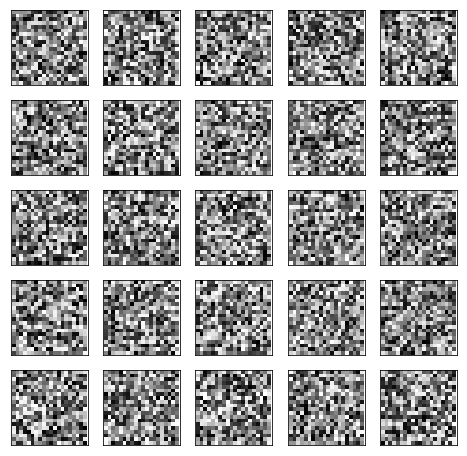

In [295]:
## ================= Part 9: Visualize Weights =================
#  You can now "visualize" what the neural network is learning by 
#  displaying the hidden units to see what features they are capturing in 
#  the data.
import importlib
importlib.reload(libplt)
print('\nVisualizing Neural Network... \n')

libplt.displayData(Theta1[:, 1:])

# 10. 实现预测

In [354]:
def predict(Theta1, Theta2, X):
    #PREDICT Predict the label of an input given a trained neural network
    #   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #   trained weights of a neural network (Theta1, Theta2)

    # Useful values
    m = len(X);
    num_labels = len(Theta2);
    
    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)),X))

    # You need to return the following variables correctly 
    p = np.zeros((len(X), 1));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned neural network. You should set p to a 
    #               vector containing labels between 1 to num_labels.
    #
    # Hint: The max function might come in useful. In particular, the max
    #       function can also return the index of the max element, for more
    #       information see 'help max'. If your examples are in rows, then, you
    #       can use max(A, [], 2) to obtain the max for each row.
    #
    Z2 = sigmoid(X @ Theta1.T)
    print((Theta1.T)[0:,:10])
    print((Theta1.T)[1:,:10])
    
    print(Z2[0])
    print(Z2[1])
    #print(Theta2.shape[1])
    A2 = np.column_stack((np.ones((m,1)),Z2))
    
    A3 = sigmoid(A2 @ Theta2.T)
    print(A3[0])
    print(A3[1])
    p = np.argmax(A3, axis = 1) #p: 5000*10
    #print(p)
    p=(p+1).reshape(-1,1)
    return p

   # =========================================================================


In [355]:
## ================= Part 10: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)
#print(pred)
compare = np.column_stack((pred,y))
#print(compare)
print('\nTraining Set Accuracy: %f\n'%(np.mean(np.double(pred == y)) * 100))

[[  2.54528289e-01   3.63250239e-02   4.51998983e-01   1.02130504e-01
    1.80109593e-01   5.32536261e-01   1.80164414e-01   6.84933667e-01
    7.87833912e-01   4.11613883e-01]
 [  4.23258614e-01   1.72793948e-02   4.97251307e-01   7.79174658e-01
    9.97007296e-01   4.73736198e-01   2.44386697e-01   5.31792312e-01
    5.21808011e-01   9.44070151e-01]
 [  4.12610261e-01   6.38729082e-01   4.48139441e-01   9.94390391e-01
    7.73563314e-01   4.66410170e-01   2.25334519e-01   3.60768023e-01
    7.74693243e-01   8.98960894e-01]
 [  4.35912903e-01   7.45636769e-01   2.64021407e-01   3.78076302e-01
    7.45775437e-01   3.62331388e-01   7.30908914e-01   6.48923520e-01
    1.41752786e-01   3.72178009e-01]
 [  4.25027470e-01   6.65447619e-01   9.06760357e-01   4.42857686e-01
    8.58459560e-01   9.88629189e-01   8.01216318e-01   5.95301245e-01
    6.44093682e-01   5.51190938e-01]
 [  3.68036114e-01   5.11608819e-01   2.84480156e-01   2.65036433e-01
    9.55940941e-01   3.28381404e-01   4.03102

In [35]:
np.set_printoptions(threshold=np.NaN)

In [353]:
X[1000]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,